In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [103]:
df = pd.read_csv('income.csv')

In [104]:
df.sample(10)

,Name,Age,Income($)
0,Rob,27,70000
17,Priyanka,41,63000
8,Brad,36,156000
12,Arnold,27,48000
19,Alia,39,80000
18,Nick,43,64000
3,Ismail,28,60000
9,Angelina,35,130000
2,Mohan,29,61000
7,Andrea,38,162000


In [105]:
df.rename(columns = {'Age':'age', 
                             'Income($)' : 'income'},
               inplace=True)
df

,Name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<Axes: xlabel='age', ylabel='income'>

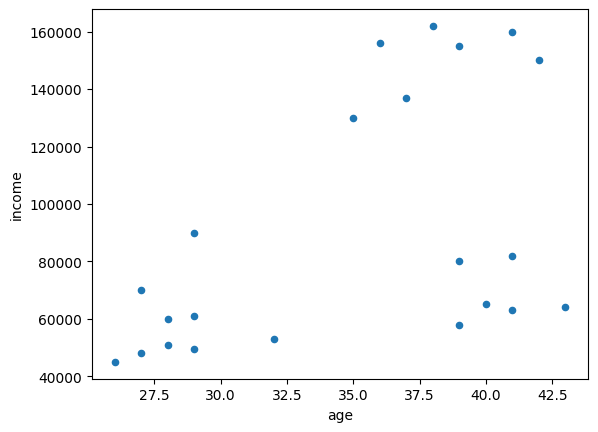

In [106]:
%matplotlib inline
df.plot(x = 'age', y = 'income', kind = 'scatter')

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_income = scaler.fit_transform(df[['income']])
scaled_age = scaler.fit_transform(df[['age']])

In [108]:
N_CLUSTERS = 2

In [109]:
from sklearn.cluster import KMeans

In [126]:
class KMeansPredictor():
  def __init__(self, N_CLUSTERS, scaled_income, scaled_age, df):
    self.N_CLUSTERS = N_CLUSTERS
    # self.scaled_income = scaled_income
    # self.scaled_age = scaled_age
    self.df = df

  def predictor(self):
    print(self.scaled_income)
    km=KMeans(n_clusters = self.N_CLUSTERS, n_init = 10, verbose = 1)
    df['scaled_income'] = scaled_income
    df['scaled_age'] = scaled_age
    pred=km.fit_predict(df[['scaled_income', 'scaled_age']])
    self.pred = pred
    return pred

  def addtodf(self, df):
    df['predicted'] = self.pred
    return df
  
  def plot_clusters(self):
    sns.scatterplot(data = self.df, x='age', y='income', hue='predicted')


In [127]:
pred = KMeansPredictor(3, scaled_income, scaled_age, df)
vals = pred.predictor()
new_df = pred.addtodf(df)
pred.plot_clusters()

AttributeError: ignored

TRYING WITH N=3

In [116]:
new_df

,Name,age,income,predicted
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


<Axes: xlabel='age', ylabel='income'>

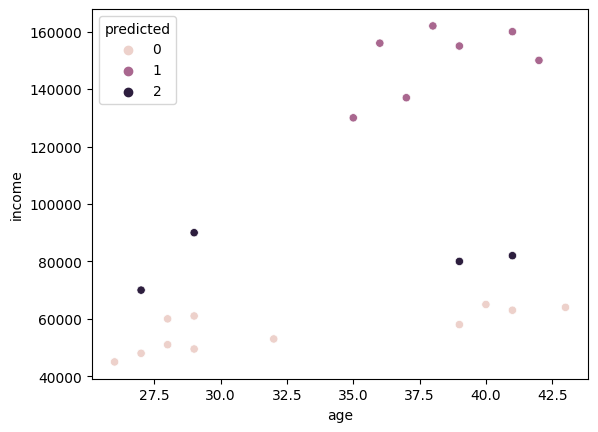

In [117]:
sns.scatterplot(x='age', y='income', data=new_df, hue='predicted')

In [112]:
N_CLUSTERS = 3
from sklearn.cluster import KMeans
km = KMeans(n_clusters = N_CLUSTERS)
pred = km.fit_predict(scaled_income, scaled_age)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
